# Decision Trees Learning

## Dataset

1. preg: Number of times pregnant
2. plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres: Diastolic blood pressure (mm Hg)
4. skin: Triceps skin fold thickness (mm)
5. insu: 2-Hour serum insulin (mu U/ml)
6. mass: Body mass index (weight in kg/(height in m)^2)
7. pedi: Diabetes pedigree function
8. age: Age (years)
9. class: Class variable (0 or 1)

In [160]:
import pandas as pd
dia_all = pd.read_csv("diabetes.txt") # This loads the full dataset 
                 # In the file, attributes are separated by ,

In [161]:
dia_all.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


## Seperate the inpout (attributes) from target (label)

In [162]:
sourcevars = dia_all.iloc[:,:-1] #all rows + all columns except the last one
targetvar = dia_all.iloc[:,-1:] #all rows + only the last column

In [163]:
sourcevars.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [164]:
targetvar.head()

,class
0,tested_positive
1,tested_negative
2,tested_positive
3,tested_negative
4,tested_positive


   ## Taks 1.a Exploratory Data Analysis (Mean, Median, Standard Deviation and Correlation Matrix)

In [165]:
sourcevars.mean(axis=0) #calculates mean

preg      3.845052
plas    120.894531
pres     69.105469
skin     20.536458
insu     79.799479
mass     31.992578
pedi      0.471876
age      33.240885
dtype: float64

In [166]:
sourcevars.median(axis=0) #calculates median

preg      3.0000
plas    117.0000
pres     72.0000
skin     23.0000
insu     30.5000
mass     32.0000
pedi      0.3725
age      29.0000
dtype: float64

In [167]:
sourcevars.std(axis=0) #calculates standard deviation

preg      3.369578
plas     31.972618
pres     19.355807
skin     15.952218
insu    115.244002
mass      7.884160
pedi      0.331329
age      11.760232
dtype: float64

In [168]:
sourcevars.corr() #calculates correlation matrix

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


   ## Taks 1.b Heatmap to understand the data and the relationship among the variables

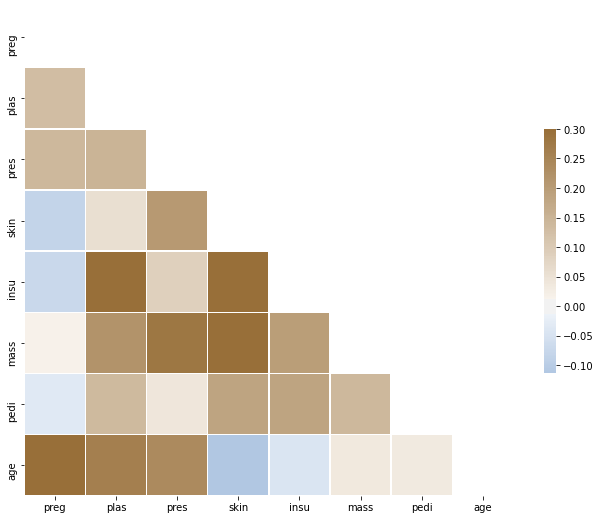

In [169]:
#creating heatmap

from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


corr = sourcevars.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
#setting up matplotlib fig
f, ax = plt.subplots(figsize=(11, 9))
#custom diverging color map
cmap = sns.diverging_palette(250, 50, as_cmap=True)
#draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

   ## Task 2.a Decision tree classifier using the training dataset and the performance is evaluated on the test dataset. Experiment is repeated 10 times using a different random split in each iteration. Performance of each iteration is shown  and the average of all iterations

In [170]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

#label encoding for class variable (y)
labelencoder = LabelEncoder()
targetvar['class'] = labelencoder.fit_transform(targetvar['class'])
targetvar['class']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int32

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import random
print("USING CRITERION GINI IMPURITY")
accuracy_gini = []
precision_gini = []
recall_gini = []
n = 1

#creating instance of model
classifier_model = DecisionTreeClassifier(random_state=120)

#inside a loop calculate accuracy, precision and reacall at each iteration
while n <= 10:
    X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar,
                                                        test_size = 0.3, random_state=random.randint(10, 120))
    classifier_model = classifier_model.fit(X_train, y_train)
    preds = classifier_model.predict(X_test)
    
    accuracy_score_gini = accuracy_score(y_test, preds)
    accuracy_gini.append(accuracy_score_gini)
    
    precision_score_gini = precision_score(y_test, preds)
    precision_gini.append(precision_score_gini)
    
    recall_score_gini = recall_score(y_test, preds)
    recall_gini.append(recall_score_gini)
    
    print("Iteration: {0}".format(n))
    print("Accuracy Score: {0}".format(accuracy_score_gini))
    print("Precision Score: {0}".format(precision_score_gini))
    print("Recall Score: {0}".format(recall_score_gini))
    n+=1
#calculating averages
print("AVERAGE ACCURACY SCORE: {0}".format(sum(accuracy_gini)/len(accuracy_gini)))
print("AVERAGE PRECISION SCORE: {0}".format(sum(precision_gini)/len(precision_gini)))
print("AVERAGE RECALL SCORE: {0}".format(sum(recall_gini)/len(recall_gini)))

USING CRITERION GINI IMPURITY
Iteration: 1
Accuracy Score: 0.6926406926406926
Precision Score: 0.5492957746478874
Recall Score: 0.5
Iteration: 2
Accuracy Score: 0.70995670995671
Precision Score: 0.5945945945945946
Recall Score: 0.5432098765432098
Iteration: 3
Accuracy Score: 0.683982683982684
Precision Score: 0.5753424657534246
Recall Score: 0.5
Iteration: 4
Accuracy Score: 0.670995670995671
Precision Score: 0.5061728395061729
Recall Score: 0.5324675324675324
Iteration: 5
Accuracy Score: 0.70995670995671
Precision Score: 0.5952380952380952
Recall Score: 0.6024096385542169
Iteration: 6
Accuracy Score: 0.6926406926406926
Precision Score: 0.5555555555555556
Recall Score: 0.5063291139240507
Iteration: 7
Accuracy Score: 0.7186147186147186
Precision Score: 0.5945945945945946
Recall Score: 0.5569620253164557
Iteration: 8
Accuracy Score: 0.70995670995671
Precision Score: 0.5421686746987951
Recall Score: 0.6081081081081081
Iteration: 9
Accuracy Score: 0.7445887445887446
Precision Score: 0.64556

   ## Task 2.b Decision tree classifier (using entropy) using the training dataset and the performance is evaluated on the test dataset. Experiment is repeated 10 times using a different random split in each iteration. Performance of each iteration is shown  and the average of all iterations

In [172]:
import random
print("USING CRITERION INFORMATION GAIN ENTROPY")
accuracy_entropy = []
precision_entropy = []
recall_entropy = []
n = 1

#creating instance of model
classifier_model = DecisionTreeClassifier(criterion='entropy', random_state=120)

#inside a loop calculate accuracy, precision and recall score at each iteration
while n <= 10:
    X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar, 
                                                        test_size = 0.3, random_state=random.randint(10, 120))
    classifier_model = classifier_model.fit(X_train, y_train)
    preds = classifier_model.predict(X_test)
    
    accuracy_score_entropy = accuracy_score(y_test, preds)
    accuracy_entropy.append(accuracy_score_entropy)
    
    precision_score_entropy = precision_score(y_test, preds)
    precision_entropy.append(precision_score_entropy)
    
    recall_score_entropy = recall_score(y_test, preds)
    recall_entropy.append(recall_score_entropy)
    
    print("Iteration: {0}".format(n))
    print("Accuracy Score: {0}".format(accuracy_score_entropy))
    print("Precision Score: {0}".format(precision_score(y_test, preds)))
    print("Recall Score: {0}".format(recall_score(y_test, preds)))
    n+=1
#calculating averages
print("AVERAGE ACCURACY SCORE: {0}".format(sum(accuracy_entropy)/len(accuracy_entropy)))
print("AVERAGE PRECISION SCORE: {0}".format(sum(precision_entropy)/len(precision_entropy)))
print("AVERAGE RECALL SCORE: {0}".format(sum(recall_entropy)/len(recall_entropy)))

USING CRITERION INFORMATION GAIN ENTROPY
Iteration: 1
Accuracy Score: 0.6753246753246753
Precision Score: 0.5873015873015873
Recall Score: 0.43023255813953487
Iteration: 2
Accuracy Score: 0.7186147186147186
Precision Score: 0.6041666666666666
Recall Score: 0.6823529411764706
Iteration: 3
Accuracy Score: 0.7229437229437229
Precision Score: 0.6086956521739131
Recall Score: 0.6666666666666666
Iteration: 4
Accuracy Score: 0.6796536796536796
Precision Score: 0.5294117647058824
Recall Score: 0.569620253164557
Iteration: 5
Accuracy Score: 0.7316017316017316
Precision Score: 0.6582278481012658
Recall Score: 0.5977011494252874
Iteration: 6
Accuracy Score: 0.7056277056277056
Precision Score: 0.5542168674698795
Recall Score: 0.5974025974025974
Iteration: 7
Accuracy Score: 0.7056277056277056
Precision Score: 0.5662650602409639
Recall Score: 0.5949367088607594
Iteration: 8
Accuracy Score: 0.7445887445887446
Precision Score: 0.625
Recall Score: 0.6790123456790124
Iteration: 9
Accuracy Score: 0.73593

   ## Task 2.c Comparing performance of two classifiers

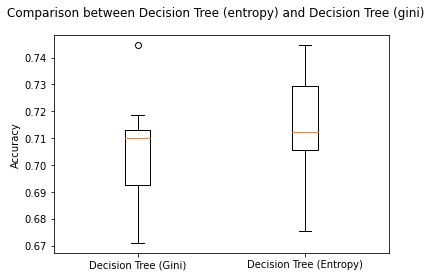

In [173]:
import matplotlib.pyplot as plt

avg_accuracy_gini = sum(accuracy_gini)/len(accuracy_gini)
avg_accuracy_entropy = sum(accuracy_entropy)/len(accuracy_entropy)

names = ['Decision Tree (Gini)', 'Decision Tree (Entropy)']

fig = plt.figure()
fig.suptitle('Comparison between Decision Tree (entropy) and Decision Tree (gini)')
ax = fig.add_subplot(111)
plt.boxplot([accuracy_gini, accuracy_entropy])
ax.set_xticklabels(names)
ax.set_ylabel("Accuracy")
plt.show()

## Task 2.d Comment on whether standardizing the data before applying DT would improve the performance for this dataset

Standardization helps when the variables in the dataset have different units. If the variables are measured at different units then do not contribute themselves equally in the analysis and create a bias. 
Standardizing the data before applying a decision tree algorithm will not affect the accuracy of the dataset. A node in a tree splits the data into two sets by comparing a variable or feature to a threshold value. In other words, a decision tree splits a node based on a single feature. Decision trees work like an ‘if’ clause. It compares and branches down the tree. 

## Task 3.a Analysis on increasing the minimum number of samples required to split an internal node parameter in the DT algorithm affect the accuracy on the test set

0.696969696969697
0.670995670995671
0.70995670995671
0.7186147186147186


Text(0, 0.5, 'Accuracy Score')

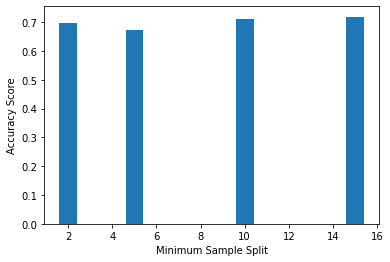

In [174]:
minimum_samples = [2, 5, 10, 15]
accuracy_score_min_samples = []
for sample in minimum_samples:
    classifier_model = DecisionTreeClassifier(random_state=120, min_samples_split=sample)
    classifier_model = classifier_model.fit(X_train, y_train)
    preds = classifier_model.predict(X_test)
    accuracy_score_min_samples.append(accuracy_score(y_test, preds))
    print(accuracy_score(y_test, preds))
plt.bar(minimum_samples, accuracy_score_min_samples)
plt.xlabel("Minimum Sample Split")
plt.ylabel("Accuracy Score")

## Task 3.b Analysis on increasing the maximum depth parameter of decision tree affect the accuracy on the test set

0.7662337662337663
0.7316017316017316
0.7532467532467533
0.7489177489177489


Text(0, 0.5, 'Accuracy Score')

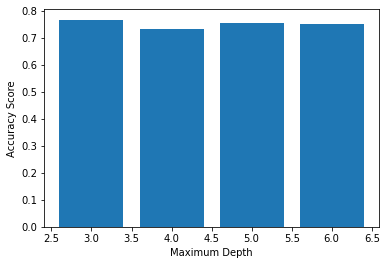

In [175]:
maximum_depth = [3, 4, 5, 6]
accuracy_score_max_depth = []

for depth in maximum_depth:
    classifier_model = DecisionTreeClassifier(random_state=120, max_depth=depth)
    classifier_model = classifier_model.fit(X_train, y_train)
    preds = classifier_model.predict(X_test)
    accuracy_score_max_depth.append(accuracy_score(y_test, preds))
    print(accuracy_score(y_test, preds))
plt.bar(maximum_depth, accuracy_score_max_depth)
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy Score")